# 1. Import Libraries & Initialize Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import tabulate
import math
import seaborn as sns

# changed display options to accomodate for long list in output
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 2000)

### Error loading data

In [ ]:
train=pd.read_csv('train.csv')
train.head(5)

/tmp/ipykernel_131/830092868.py:1: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('train.csv')


Attempting to troubleshoot by trying to identify the problem; possible problems are:
- Low memory; not enough RAM on current device
- Error in encoding dtypes (pandas may have issue naming and categorizing dtypes to features)

In [2]:
!wc -l train.csv
!wc -l test.csv

145232 train.csv
145233 test.csv


In [3]:
!head -2 'train.csv'

"ID","VAR_0001","VAR_0002","VAR_0003","VAR_0004","VAR_0005","VAR_0006","VAR_0007","VAR_0008","VAR_0009","VAR_0010","VAR_0011","VAR_0012","VAR_0013","VAR_0014","VAR_0015","VAR_0016","VAR_0017","VAR_0018","VAR_0019","VAR_0020","VAR_0021","VAR_0022","VAR_0023","VAR_0024","VAR_0025","VAR_0026","VAR_0027","VAR_0028","VAR_0029","VAR_0030","VAR_0031","VAR_0032","VAR_0033","VAR_0034","VAR_0035","VAR_0036","VAR_0037","VAR_0038","VAR_0039","VAR_0040","VAR_0041","VAR_0042","VAR_0043","VAR_0044","VAR_0045","VAR_0046","VAR_0047","VAR_0048","VAR_0049","VAR_0050","VAR_0051","VAR_0052","VAR_0053","VAR_0054","VAR_0055","VAR_0056","VAR_0057","VAR_0058","VAR_0059","VAR_0060","VAR_0061","VAR_0062","VAR_0063","VAR_0064","VAR_0065","VAR_0066","VAR_0067","VAR_0068","VAR_0069","VAR_0070","VAR_0071","VAR_0072","VAR_0073","VAR_0074","VAR_0075","VAR_0076","VAR_0077","VAR_0078","VAR_0079","VAR_0080","VAR_0081","VAR_0082","VAR_0083","VAR_0084","VAR_0085","VAR_0086","VAR_0087","VAR_0088","VAR_0089","VAR_0090","VAR_

In [8]:
train_sub=pd.read_csv('train.csv', nrows=10000, low_memory=False)
train_sub.head(5)

ID VAR_0001  VAR_0002  VAR_0003  VAR_0004 VAR_0005  VAR_0006  VAR_0007  \
0   2        H       224         0      4300        C       0.0       0.0   
1   4        H         7        53      4448        B       1.0       0.0   
2   5        H       116         3      3464        C       0.0       0.0   
3   7        H       240       300      3200        C       0.0       0.0   
4   8        R        72       261      2000        N       0.0       0.0   

  VAR_0008 VAR_0009 VAR_0010 VAR_0011 VAR_0012  VAR_0013  VAR_0014  VAR_0015  \
0    False    False    False    False    False       0.0       0.0       0.0   
1    False    False    False    False    False       1.0       0.0       1.0   
2    False    False    False    False    False       0.0       0.0       0.0   
3    False    False    False    False    False       0.0       0.0       0.0   
4    False    False    False    False    False       0.0       0.0       0.0   

   VAR_0016  VAR_0017  VAR_0018  VAR_0019  VAR_0020  VAR_0021  VAR_0022  \
0       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       2.0       1.0       0.0       0.0       0.0       0.0       0.0   
2       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       2.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

   VAR_0023  VAR_0024  VAR_0025  VAR_0026  VAR_0027  VAR_0028  VAR_0029  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   VAR_0030  VAR_0031  VAR_0032  VAR_0033  VAR_0034  VAR_0035  VAR_0036  \
0       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       1.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       0.0   

   VAR_0037  VAR_0038  VAR_0039  VAR_0040  VAR_0041  VAR_0042 VAR_0043  \
0       0.0       0.0       0.0       0.0       0.0       0.0    False   
1       0.0       0.0       0.0       0.0       0.0       0.0    False   
2       0.0       0.0       0.0       0.0       0.0       0.0    False   
3       0.0       0.0       0.0       0.0       0.0       0.0    False   
4       0.0       0.0       0.0       0.0       0.0       0.0    False   

  VAR_0044  VAR_0045  VAR_0046  VAR_0047  VAR_0048  VAR_0049  VAR_0050  \
0       []       0.0       0.0       0.0       0.0       0.0       0.0   
1       []       0.0       0.0       0.0       0.0       1.0       1.0   
2       []       0.0       0.0       0.0       0.0       0.0       0.0   
3       []       0.0       0.0       0.0       0.0       0.0       0.0   
4       []       0.0       0.0       0.0       0.0       0.0       0.0   

   VAR_0051  VAR_0052  VAR_0053  VAR_0054  VAR_0055  VAR_0056  VAR_0057  \
0       0.0       1.0       1.0       1.0       1.0       1.0       1.0   
1       1.0       1.0       2.0       2.0       2.0       3.0       3.0   
2       0.0       1.0       1.0       1.0       1.0       1.0       1.0   
3       1.0       1.0       1.0       1.0       1.0       1.0       1.0   
4       0.0       1.0       1.0       1.0       1.0       1.0       1.0   

   VAR_0058  VAR_0059  VAR_0060  VAR_0061  VAR_0062  VAR_0063  VAR_0064  \
0       1.0       1.0       1.0       1.0       1.0       1.0       1.0   
1       3.0       1.0       2.0       2.0       2.0       3.0       3.0   
2       1.0       1.0       1.0       1.0       1.0       1.0       1.0   
3       1.0       1.0       1.0       1.0       1.0       1.0    

### Troubleshoot
This is a dataset with 145,000+ data points making it a large dataset that my device does not have enough RAM to compute all at once -- causing kernel to crash.


Upon loading in a smaller chunk (~1/3) of the original dataset pandas had enough computational power to compute the confusing dtypes.


### Conclusion
Memory was the main problem and moving forward with this dataset will require working in chunks/sub-sets.

In [3]:
# can load ~1/3 of dataset so will split into 3 chunks
n_chunks=3

# total num of rows in OG file
n_rows=sum(1 for row in open('train.csv')) -1 # subtract header row

chunk_size=n_rows // n_chunks

In [10]:
for chunk in pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False):
    print(chunk.shape)
    print(chunk.info())

(48410, 1934)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48410 entries, 0 to 48409
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 714.3+ MB
None
(48410, 1934)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48410 entries, 48410 to 96819
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 714.3+ MB
None
(48410, 1934)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48410 entries, 96820 to 145229
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 714.3+ MB
None
(1, 1934)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 145230 to 145230
Columns: 1934 entries, ID to target
dtypes: bool(13), float64(27), int64(1880), object(14)
memory usage: 15.1+ KB
None


### Note
Only the remainder chunk has a boolean dtype ??

There may be a discrepancy in how pandas defined the dtypes between the first 3 chunks and the last (remainder) chunk.

## Data Viz

In [5]:
for chunk in pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False):
    print(chunk.dtypes)

ID           int64
VAR_0001    object
VAR_0002     int64
VAR_0003     int64
VAR_0004     int64
             ...  
VAR_1931     int64
VAR_1932     int64
VAR_1933     int64
VAR_1934    object
target       int64
Length: 1934, dtype: object
ID           int64
VAR_0001    object
VAR_0002     int64
VAR_0003     int64
VAR_0004     int64
             ...  
VAR_1931     int64
VAR_1932     int64
VAR_1933     int64
VAR_1934    object
target       int64
Length: 1934, dtype: object
ID           int64
VAR_0001    object
VAR_0002     int64
VAR_0003     int64
VAR_0004     int64
             ...  
VAR_1931     int64
VAR_1932     int64
VAR_1933     int64
VAR_1934    object
target       int64
Length: 1934, dtype: object
ID           int64
VAR_0001    object
VAR_0002     int64
VAR_0003     int64
VAR_0004     int64
             ...  
VAR_1931     int64
VAR_1932     int64
VAR_1933     int64
VAR_1934    object
target       int64
Length: 1934, dtype: object


In [18]:
for chunk in pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False):
    print(chunk.nunique())

ID          48410
VAR_0001        3
VAR_0002      736
VAR_0003      537
VAR_0004     5832
            ...  
VAR_1931       10
VAR_1932       59
VAR_1933      281
VAR_1934        5
target          2
Length: 1934, dtype: int64
ID          48410
VAR_0001        3
VAR_0002      716
VAR_0003      535
VAR_0004     5842
            ...  
VAR_1931       10
VAR_1932       55
VAR_1933      277
VAR_1934        5
target          2
Length: 1934, dtype: int64
ID          48410
VAR_0001        3
VAR_0002      726
VAR_0003      531
VAR_0004     5817
            ...  
VAR_1931       10
VAR_1932       54
VAR_1933      280
VAR_1934        5
target          2
Length: 1934, dtype: int64
ID          1
VAR_0001    1
VAR_0002    1
VAR_0003    1
VAR_0004    1
           ..
VAR_1931    1
VAR_1932    1
VAR_1933    1
VAR_1934    1
target      1
Length: 1934, dtype: int64


In [6]:
chunk = next(pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False))

# Iterate through each column in the first chunk
for col in chunk.columns:
    # Skip the target column
    if col == 'target':
        continue
    
    properties = []
    
    # Determine the data type of the column
    data_type = 'Categorical' if chunk[col].dtype == 'object' else 'Numerical'
    properties.append(col)
    properties.append(data_type)
    
    # Get the unique values or range of values depending on the data type
    if data_type == 'Categorical':
        values = chunk[col].unique()
    else:
        values = f'{chunk[col].min()} to {chunk[col].max()}'
        
    properties.append(values)
    
    # Append the information to the table (list)
    table.append(properties)

# Converting the values in the table list to strings for display


# Convert table to HTML format
table_of_lists = [list(row) for row in table]
tabulate.tabulate(table_of_lists, tablefmt='html', headers=['Features', 'Data Type', 'Values'])

Features,Data Type,Values
VAR_1934,Categorical,['IAPS' 'RCC' 'BRANCH' 'MOBILE' 'CSC']
VAR_1934,Categorical,['CSC' 'IAPS' 'BRANCH' 'MOBILE' 'RCC']
VAR_1934,Categorical,['BRANCH' 'IAPS' 'CSC' 'MOBILE' 'RCC']
VAR_1934,Categorical,['IAPS']
ID,Numerical,2 to 96687
VAR_0001,Categorical,['H' 'R' 'Q']
VAR_0002,Numerical,0 to 999
VAR_0003,Numerical,0 to 999
VAR_0004,Numerical,0 to 741100
VAR_0005,Categorical,['C' 'B' 'N' 'S']


Missing values seem to be -1, nan, [].

Others could potentially be 999,999,999 and -99,999.

Potential features: states, cities, income, job titles, age

Some features are constant (ex. VAR_0847 1 to 1)

VAR_0518 - VAR_0530 has worrying ranges

Many values seem to be survey-like and may not actually be numerical but instead should be converted into categories.

VAR_0217, 0177, 0176, 0168, 0169, 0167, 0159, 0158, 0157, 0156, 0075, 0073,  are time dtypes and need to be converted.

Some values go deep into the negatives (ex. VAR_0340 -344,408,449)

Very difficult to visualize not only because of high_dimensionality but also the high amount of data features to process.

## Class Distribution

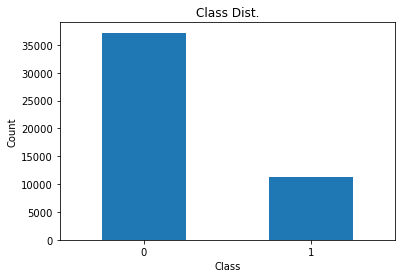

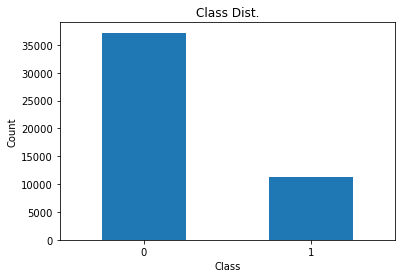

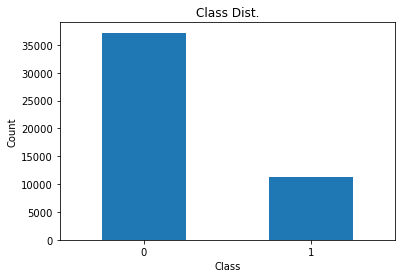

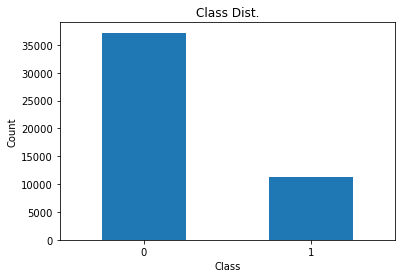

In [13]:
target = 'target'
counts=chunk[target].value_counts()

for chunk in pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False):
    counts.plot(kind='bar')
    plt.title('Class Dist.')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

## Missing Values

In [17]:
for chunk in pd.read_csv('train.csv', chunksize=chunk_size, low_memory=False):
    print(np.any(chunk.isnull()))
    print(chunk.isnull().sum())

True
ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
           ..
VAR_1931    0
VAR_1932    0
VAR_1933    0
VAR_1934    0
target      0
Length: 1934, dtype: int64
True
ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
           ..
VAR_1931    0
VAR_1932    0
VAR_1933    0
VAR_1934    0
target      0
Length: 1934, dtype: int64
True
ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
           ..
VAR_1931    0
VAR_1932    0
VAR_1933    0
VAR_1934    0
target      0
Length: 1934, dtype: int64
True
ID          0
VAR_0001    0
VAR_0002    0
VAR_0003    0
VAR_0004    0
           ..
VAR_1931    0
VAR_1932    0
VAR_1933    0
VAR_1934    0
target      0
Length: 1934, dtype: int64
